In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<AxesSubplot:xlabel='Weight', ylabel='Count'>

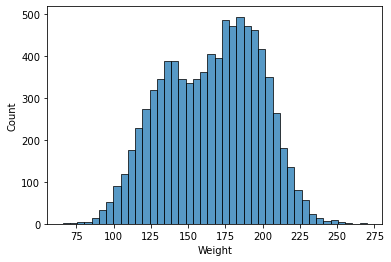

In [4]:
sns.histplot(df['Weight'])

<AxesSubplot:xlabel='Height', ylabel='Count'>

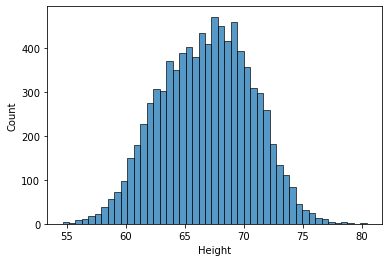

In [5]:
sns.histplot(df['Height'])

<AxesSubplot:xlabel='Height', ylabel='Count'>

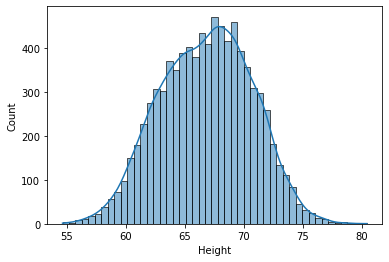

In [6]:
sns.histplot(df['Height'], kde=True)

# Remove Outliers

In [7]:
mean_value = df['Height'].mean()

In [8]:
mean_value

66.80992512908925

In [9]:
std_value = df['Height'].std()

In [10]:
std_value

3.8514544315772765

In [11]:
std_3_neg = mean_value - (3*std_value)
std_3_neg

55.25556183435742

In [12]:
std_3_pos = mean_value + (3*std_value)
std_3_pos

78.36428842382108

In [13]:
df[df.Height < std_3_neg]

,Gender,Height,Weight
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
7617,Female,55.148557,88.812412


In [14]:
df[df.Height > std_3_pos]

,Gender,Height,Weight
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989698
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6328,Female,80.450000,178.020675


In [15]:
new_df = df[(df.Height>std_3_neg) & (df.Height<std_3_pos)]
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405


In [16]:
df.shape[0] - new_df.shape[0]

8

<AxesSubplot:xlabel='Height', ylabel='Count'>

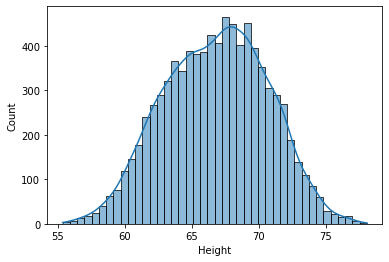

In [17]:
sns.histplot(new_df['Height'], kde=True)

# Z SCORE

In [18]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [19]:
df.shape

(8555, 3)

In [20]:
df['zscores'] = (df.Height - df.Height.mean()) / df.Height.std()

In [21]:
df.head()

,Gender,Height,Weight,zscores
0,Male,73.847017,241.893563,1.827126
1,Male,68.781904,162.310473,0.512009
2,Male,74.110105,212.740856,1.895435
3,Male,71.730978,220.042470,1.277713
4,Male,69.881796,206.349801,0.797587


In [22]:
minz = df['zscores'].min()

In [23]:
maxz = df['zscores'].max()

In [24]:
maxz

3.5415386870680865

In [25]:
minz

-3.1658344959558185

In [26]:
df[df.zscores > 3]

,Gender,Height,Weight,zscores
1317,Male,78.462053,227.342565,3.025384
2014,Male,78.998742,269.989698,3.164731
3285,Male,78.528210,253.889004,3.042561
3757,Male,78.621374,245.733783,3.066750
6328,Female,80.450000,178.020675,3.541539


In [27]:
df[df.zscores < -3]

,Gender,Height,Weight,zscores
6624,Female,54.616858,71.393749,-3.165834
7294,Female,54.873728,78.606670,-3.099140
7617,Female,55.148557,88.812412,-3.027783


In [28]:
df.head()

,Gender,Height,Weight,zscores
0,Male,73.847017,241.893563,1.827126
1,Male,68.781904,162.310473,0.512009
2,Male,74.110105,212.740856,1.895435
3,Male,71.730978,220.042470,1.277713
4,Male,69.881796,206.349801,0.797587


In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
st = StandardScaler()

In [31]:
df['ZH'] = st.fit_transform(df[['Height']])

In [32]:
df.head()

,Gender,Height,Weight,zscores,ZH
0,Male,73.847017,241.893563,1.827126,1.827233
1,Male,68.781904,162.310473,0.512009,0.512039
2,Male,74.110105,212.740856,1.895435,1.895545
3,Male,71.730978,220.042470,1.277713,1.277788
4,Male,69.881796,206.349801,0.797587,0.797634
